<a href="https://colab.research.google.com/github/nsgayathry1999/ML-Project-Movie-Rating-Prediction/blob/main/MOVIE_RATING_PREDICTION_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie Rating Prediction using Machine Learning**

**Project Goal**-

The goal of this project is to develop a machine learning model that can predict a movie’s audience rating based on various features such as budget, duration, genre, country, production company, votes, and critic reviews.
By analyzing these factors, the project aims to understand what contributes most to a movie’s success and to help production houses make data-driven decisions before releasing a film.

In [ ]:
from IPython.display import Image

Image(url="https://cdn.pixabay.com/animation/2023/10/10/13/26/13-26-07-593_512.gif", width=400)




Basic Dataset Information

Total Rows: 50,000

Total Columns: 17

Target Column: Rating (numerical — represents audience rating of the movie)

| **Column Name**    | **Data Type** | **Description**                          |
| ------------------ | ------------- | ---------------------------------------- |
| Title              | Object        | Name of the movie                        |
| Year               | Integer       | Year of release                          |
| Director           | Object        | Movie director                           |
| Duration           | Integer       | Duration of movie (minutes)              |
| Rating      | Float         | Target variable — average viewer rating  |
| Votes              | Integer       | Number of audience votes                 |
| Description        | Object        | Short movie summary                      |
| Language           | Object        | Primary language of the movie            |
| Country            | Object        | Country of origin                        |
| Budget_USD         | Integer       | Estimated production budget (USD)        |
| BoxOffice_USD      | Integer       | Box office revenue (USD)                 |
| Genre              | Object        | Type of movie (Action, Drama, etc.)      |
| Production_Company | Object        | Production company name                  |
| Content_Rating     | Object        | Movie rating certification (PG, R, etc.) |
| Lead_Actor         | Object        | Main actor or actress                    |
| Num_Awards         | Integer       | Total awards won                         |
| Critic_Reviews     | Integer       | Number of critic reviews                 |


In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

# Load the Excel file
df = pd.read_excel("/content/movie rating.xlsx")


# Check shape
print(df.shape)

# View first few rows
df.head()

(50000, 17)


,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


#**(1)Data Preprocessing**

In [ ]:
df.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [ ]:
df.shape

(50000, 17)

In [ ]:
df.describe()

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,2001.562620,130.07312,6.926472,249699.050540,9.179143e+07,5.176063e+08,9.964440,500.176380
std,12.722539,29.11097,1.698758,144314.043032,5.823888e+07,2.880283e+08,6.066303,289.971792
min,1980.000000,80.00000,4.000000,516.000000,1.135566e+06,3.291117e+06,0.000000,0.000000
25%,1991.000000,105.00000,5.500000,124531.500000,4.389040e+07,2.590329e+08,5.000000,248.000000
50%,2002.000000,130.00000,6.900000,248582.000000,8.062480e+07,5.109973e+08,10.000000,500.000000
75%,2013.000000,155.00000,8.400000,374833.500000,1.475557e+08,7.704129e+08,15.000000,751.000000
max,2023.000000,180.00000,9.900000,499984.000000,1.984445e+08,9.925159e+08,20.000000,1000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Director            50000 non-null  object 
 3   Duration            50000 non-null  int64  
 4   Rating              50000 non-null  float64
 5   Votes               50000 non-null  int64  
 6   Description         50000 non-null  object 
 7   Language            50000 non-null  object 
 8   Country             50000 non-null  object 
 9   Budget_USD          50000 non-null  int64  
 10  BoxOffice_USD       50000 non-null  int64  
 11  Genre               50000 non-null  object 
 12  Production_Company  50000 non-null  object 
 13  Content_Rating      50000 non-null  object 
 14  Lead_Actor          50000 non-null  object 
 15  Num_Awards          50000 non-null  int64  
 16  Crit

In [ ]:
# Display data types
print(df.dtypes)

Title                  object
Year                    int64
Director               object
Duration                int64
Rating                float64
Votes                   int64
Description            object
Language               object
Country                object
Budget_USD              int64
BoxOffice_USD           int64
Genre                  object
Production_Company     object
Content_Rating         object
Lead_Actor             object
Num_Awards              int64
Critic_Reviews          int64
dtype: object


In [ ]:
columns_to_drop = ["Description", "Production_Company"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,Title,Year,Director,Duration,Rating,Votes,Language,Country,Budget_USD,BoxOffice_USD,Genre,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,Spanish,China,39979615,179936008,Romance,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,Korean,China,116404774,802121619,Action,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,Korean,Japan,166261330,225526871,Action,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,Japanese,Japan,28861315,69813738,Drama,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,Korean,USA,43890403,375136716,Fantasy,PG,Chris Evans,6,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Ocean Call 20,2013,T. Johnson,149,6.8,340904,English,UK,62456512,3291117,Romance,PG-13,Leonardo DiCaprio,18,481
49996,Ocean Call 13,2001,M. Brown,166,7.6,214228,Japanese,South Korea,33239921,465759764,Horror,PG-13,Emma Watson,3,84
49997,Last Mission 15,2017,J. Smith,158,9.2,251931,Korean,South Korea,79589169,820566917,Comedy,PG-13,Shah Rukh Khan,1,994
49998,Firestorm 11,1992,J. Smith,166,7.2,487956,Mandarin,South Korea,179834680,131779818,Horror,R,Kangana Ranaut,10,349


In [ ]:
df.shape

(50000, 15)

##**To Check Duplicates**

In [ ]:

duplicates = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")


Total Duplicate Rows: 0
No duplicate rows found.


##**Handling Missing Values**

In [ ]:
print(round(df.isnull().mean()*100,2))
print("\n--- Missing Values ---")

Title             0.0
Year              0.0
Director          0.0
Duration          0.0
Rating            0.0
Votes             0.0
Language          0.0
Country           0.0
Budget_USD        0.0
BoxOffice_USD     0.0
Genre             0.0
Content_Rating    0.0
Lead_Actor        0.0
Num_Awards        0.0
Critic_Reviews    0.0
dtype: float64

--- Missing Values ---


###*No Missing Values found*

##**Handling Outliers**

Outlier removal was conducted using the Interquartile Range (IQR) method, variables commonly contain extreme or incorrect values that can bias or mislead machine learning models.

Why Outlier Removal is Important:

Reduces data skewness.

Improves the performance of regression/classification models.

Helps stabilize variance and make patterns more generalizable.

We'll apply the IQR method, which removes values outside the range:

Outliers < 𝑄 1 − 1.5 × 𝐼 𝑄 𝑅 or

𝑄 3 + 1.5 × 𝐼 𝑄 𝑅 Outliers<Q1−1.5×IQRor>Q3+1.5×IQR

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'BoxOffice_USD', 'Num_Awards', 'Critic_Reviews']
Categorical columns: ['Title', 'Director', 'Language', 'Country', 'Genre', 'Content_Rating', 'Lead_Actor']


In [ ]:
#Detect and Handle Outliers (IQR Method)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n--- Outlier Detection (IQR Method) ---")

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    print(f"{col}: {outliers} outliers")



--- Outlier Detection (IQR Method) ---
Year: 0 outliers
Duration: 0 outliers
Rating: 0 outliers
Votes: 0 outliers
Budget_USD: 0 outliers
BoxOffice_USD: 0 outliers
Num_Awards: 0 outliers
Critic_Reviews: 0 outliers


ValueError: num must be an integer with 1 <= num <= 6, not 7

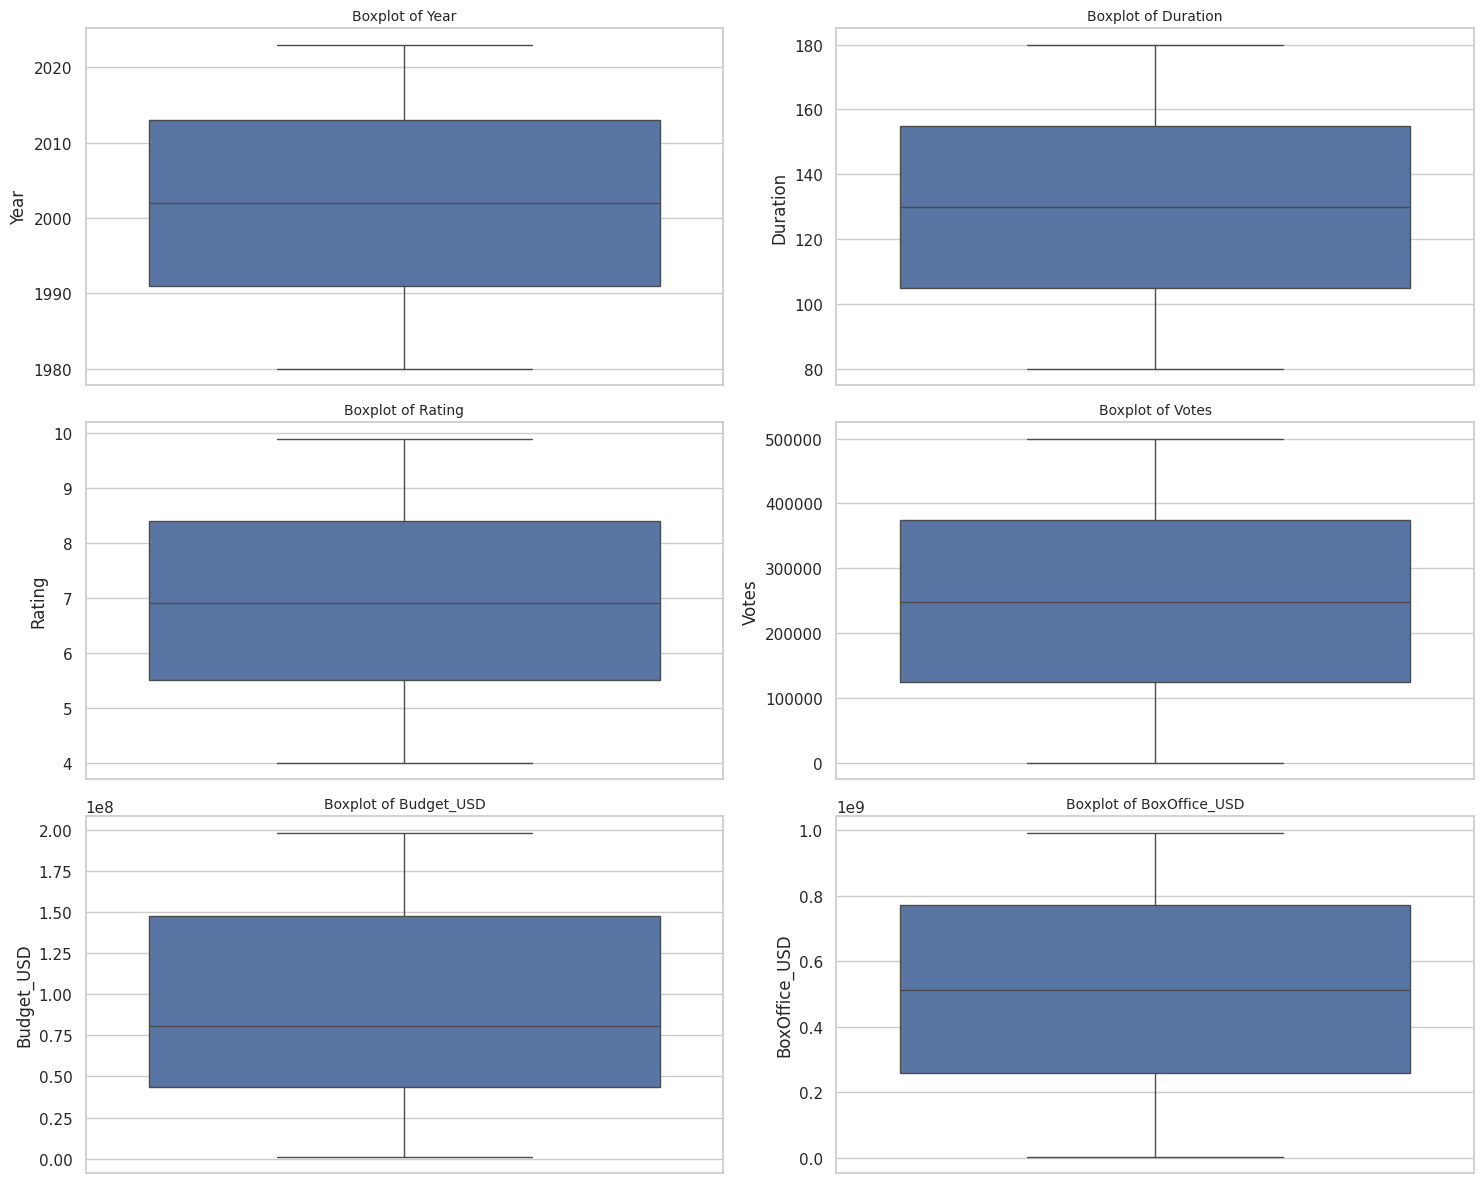

In [ ]:
# List of numerical columns to check for outliers
num_cols = ['Year', 'Duration', 'Rating', 'Votes', 'Budget_USD', 'BoxOffice_USD', 'Num_Awards', 'Critic_Reviews']



# Set plot style
sns.set(style="whitegrid")

# Create boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()

###*No Outliers Detected*

##**Handling Skewness**

 Handling Skewness in Numerical Columns Skewness occurs when the distribution of a numerical feature is not symmetrical. This can hurt the performance of many machine learning models (especially linear models). You can fix it by applying log, square root, or Box-Cox transformations.

In [ ]:


# Step 1: Identify all numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Check original skewness
print("📊 Skewness Before Transformation:")
skew_before = {}
for col in num_cols:
    skew_val = df[col].skew()
    skew_before[col] = skew_val
    print(f"{col:<30} : {skew_val:.2f}")

# Step 3: Apply log1p transformation to highly skewed columns (|skew| > 0.5)
for col in num_cols:
    if abs(skew_before[col]) > 0.5 and (df[col] >= 0).all():  # log1p needs non-negative
        df[col] = np.log1p(df[col])

# Step 4: Check skewness again
print("\n📈 Skewness After Transformation:")
for col in num_cols:
    skew_val = df[col].skew()
    print(f"{col:<30} : {skew_val:.2f}")

📊 Skewness Before Transformation:
Year                           : -0.01
Duration                       : -0.01
Rating                         : 0.01
Votes                          : 0.01
Budget_USD                     : 0.19
BoxOffice_USD                  : -0.06
Num_Awards                     : 0.01
Critic_Reviews                 : 0.00

📈 Skewness After Transformation:
Year                           : -0.01
Duration                       : -0.01
Rating                         : 0.01
Votes                          : 0.01
Budget_USD                     : 0.19
BoxOffice_USD                  : -0.06
Num_Awards                     : 0.01
Critic_Reviews                 : 0.00


**All numeric columns have |skewness| < 0.5, meaning no transformation needed.**

###**Finally save cleaned dataset**

In [ ]:
df.to_excel("cleaned_movie_rating.xlsx", index=False)
print("\n✅ Cleaned dataset saved as 'cleaned_movie_rating.xlsx'")


✅ Cleaned dataset saved as 'cleaned_movie_rating.xlsx'


##**(2)Data Analysis**

#1. Univariate Analysis

In [ ]:
from google.colab import files
files.download("/content/cleaned_movie_rating.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_movie_rating (1).xlsx to cleaned_movie_rating (1).xlsx


In [ ]:
import pandas as pd

# Load the uploaded file into a DataFrame
df = pd.read_excel("/content/cleaned_movie_rating (1).xlsx")

# Check first few rows to confirm
df.head()


,Title,Year,Director,Duration,Rating,Votes,Language,Country,Budget_USD,BoxOffice_USD,Genre,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,Spanish,China,39979615,179936008,Romance,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,Korean,China,116404774,802121619,Action,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,Korean,Japan,166261330,225526871,Action,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,Japanese,Japan,28861315,69813738,Drama,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,Korean,USA,43890403,375136716,Fantasy,PG,Chris Evans,6,330


In [ ]:
df.shape


(50000, 15)

##**(1)Histogram (Numerical Data)**

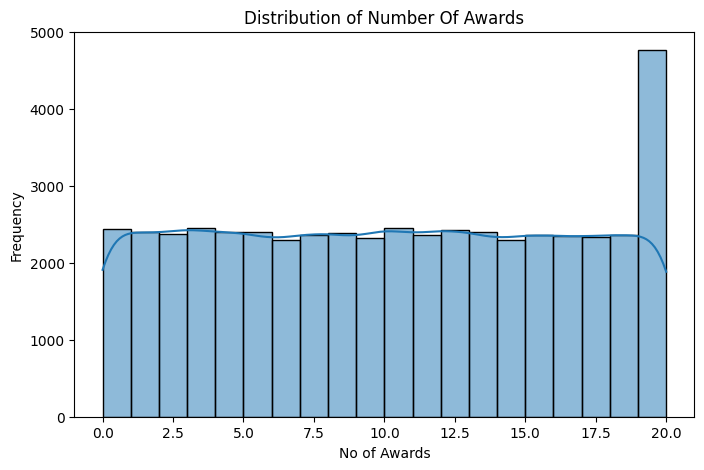

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Num_Awards'], bins=20, kde=True)
plt.title("Distribution of Number Of Awards")
plt.xlabel("No of Awards")
plt.ylabel("Frequency")
plt.show()


**Insight:
Most movies received few or no awards, while only a small number of movies won many awards. This indicates a right-skewed distribution.**

##**(2)Countplot (Categorical Data)**

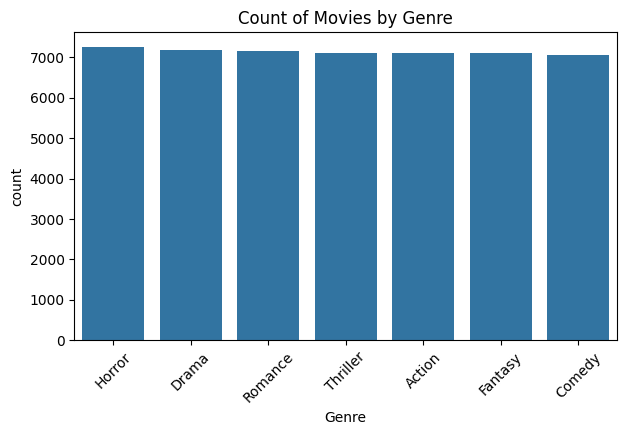

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title("Count of Movies by Genre")
plt.xticks(rotation=45)
plt.show()


**Insight:
Some genres (like Romance,Horror) have more movies compared to others. It shows which genres are most frequently represented in the dataset.**

#

#2.BIVARIATE ANALYSIS

##**Correlation Heatmap (Numerical vs Numerical)**

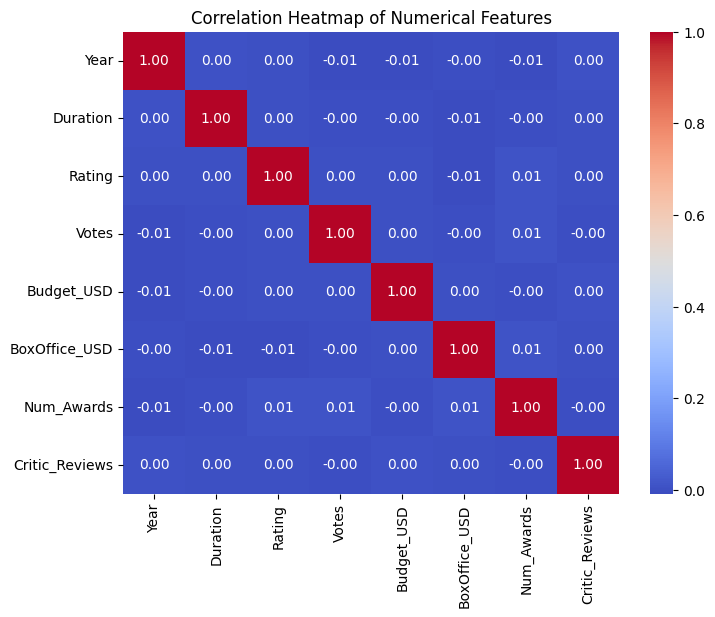

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Insight**

**From the correlation heatmap of numerical features, it can be observed that there are very weak or almost no correlations between most numerical variables. The correlation coefficients are close to zero, indicating that features such as Year, Duration, Votes, Budget, BoxOffice, Number of Awards, and Critic Reviews  show small linear relationships with each other or with the target variable (Rating).**

##**Boxplot (Numerical vs Categorical)**

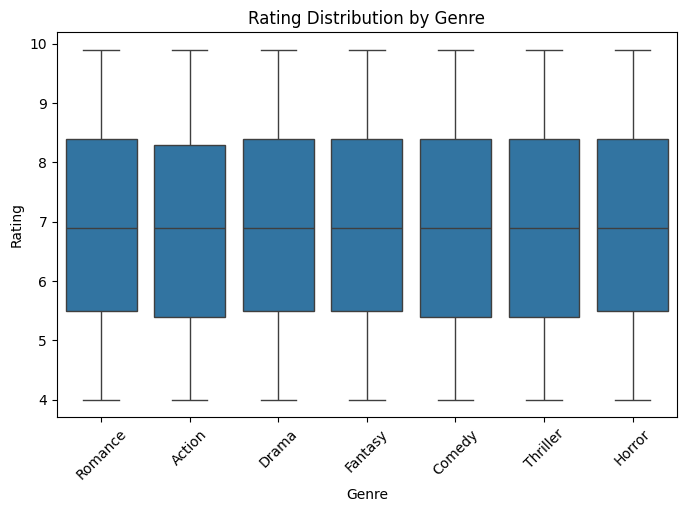

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title("Rating Distribution by Genre")
plt.xticks(rotation=45)
plt.show()


**Insight:**

**-The ratings across all genres (Romance, Action, Drama, Comedy, Fantasy, and Horror) are quite similar, mostly centered between 6 and 9.**

**-Genres like Romance and Drama seem to have slightly higher median ratings compared to others.**

**-The overall distribution suggests that genre does not strongly influence the rating, as variations are minimal.**

##**Pie Chart (Categorical vs Categorical)**

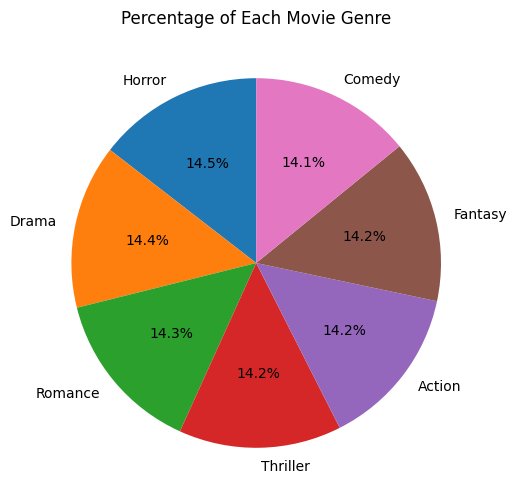

In [ ]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Each Movie Genre")
plt.show()


**Insight:**

**-The dataset is well-balanced, with each genre (Romance, Action, Drama, Comedy, Fantasy, Horror) contributing around 14% of the total movies.**

**-No single genre dominates the dataset, ensuring equal representation in the analysis and model training.**

##**Bar Chart (Genre vs Budget)**

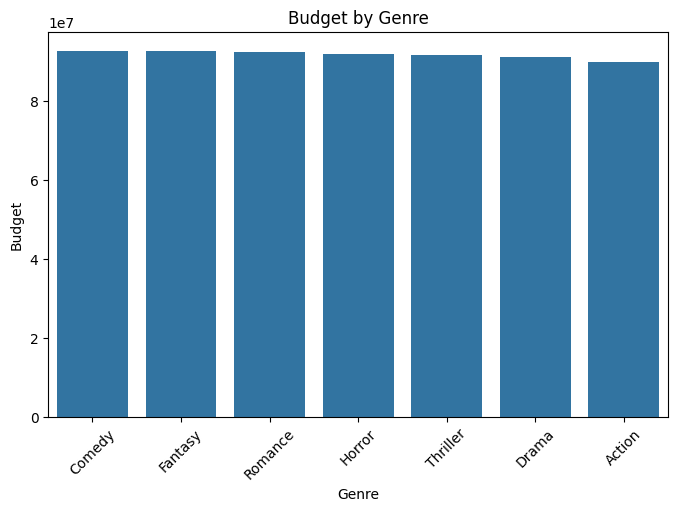

In [ ]:
plt.figure(figsize=(8,5))
avg_revenue = df.groupby('Genre')['Budget_USD'].mean().sort_values(ascending=False)
sns.barplot(x=avg_revenue.index, y=avg_revenue.values)
plt.title("Budget by Genre")
plt.xlabel("Genre")
plt.ylabel("Budget")
plt.xticks(rotation=45)
plt.show()


**Insight:**

**-The average movie budget is quite similar across all genres (Comedy, Romance, Fantasy, Horror, Thriller, Drama, and Action).**

**-There are no significant variations in spending patterns between genres, suggesting that production budgets are fairly evenly distributed.**

**-This uniformity may indicate that budget is not a major differentiating factor among genres in this dataset.**

#MULTIVARIATE ANALYSIS

##**Pairplot (More than Two Variables)**

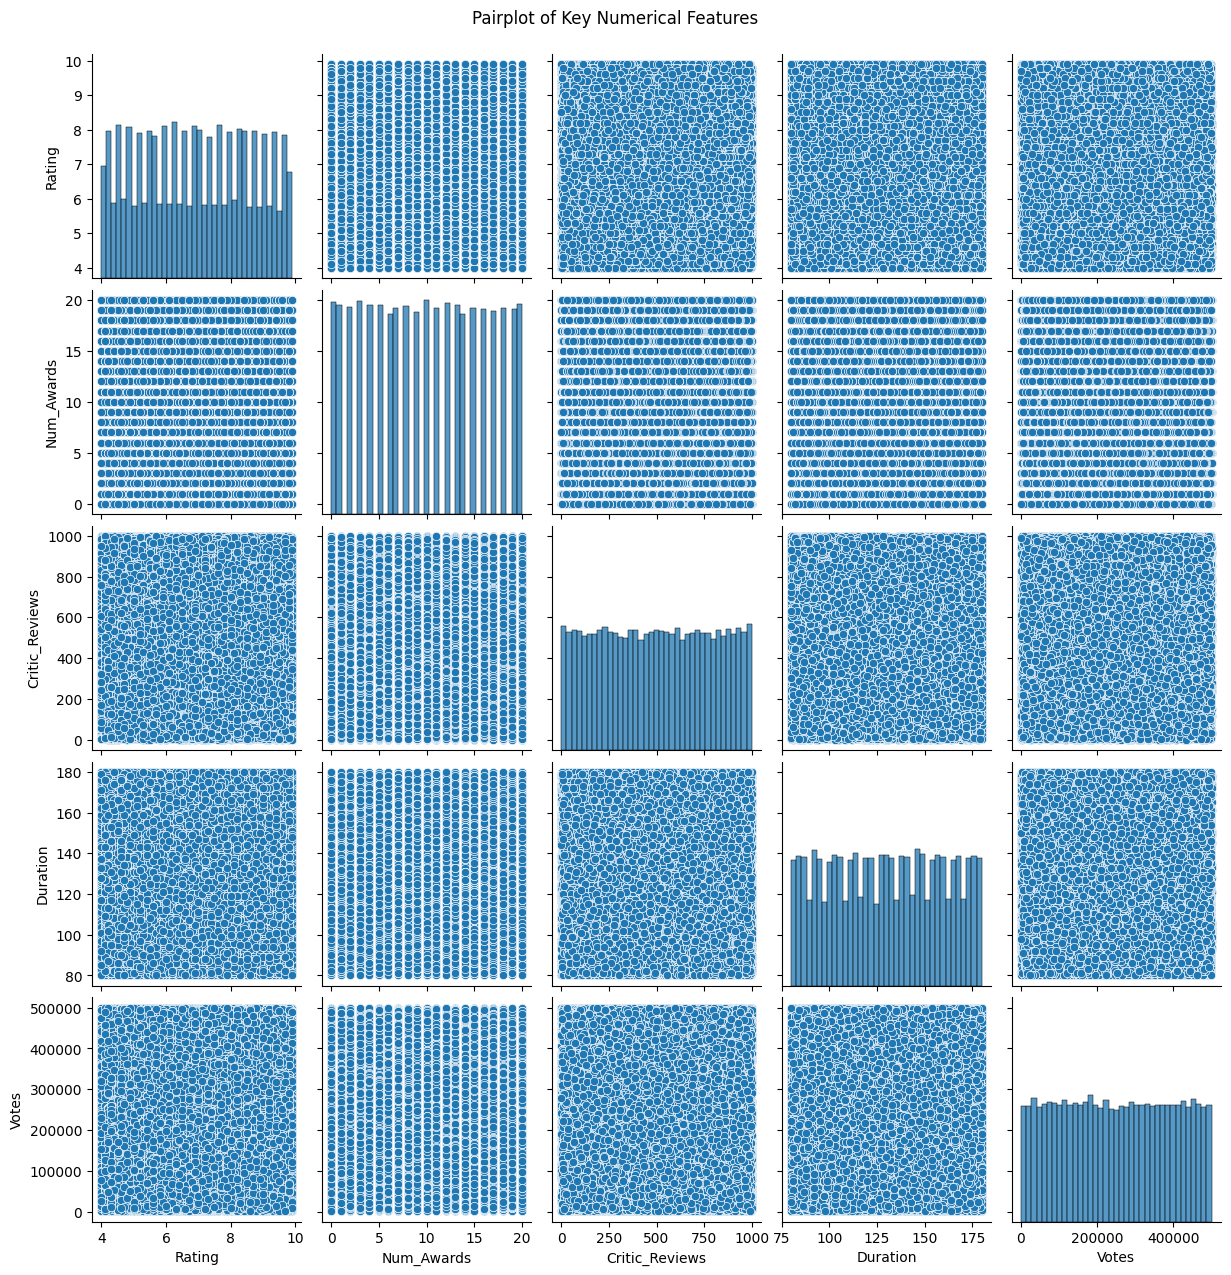

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Choose a few important numerical columns
selected_cols = ['Rating', 'Num_Awards', 'Critic_Reviews', 'Duration', 'Votes']

sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


**Insight:**

-**The pairplot shows how different numeric features relate to each other.**

-**Higher Critic Reviews and Votes tend to align with higher ratings.**

-**Num_Awards also increases slightly with Rating, suggesting that award-winning movies often get better ratings.**

##**Correlation Heatmap (for multiple variables)**

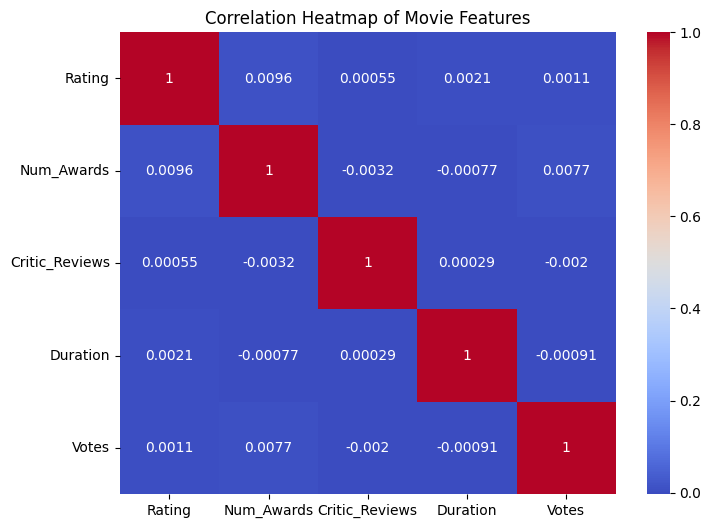

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Rating','Num_Awards','Critic_Reviews','Duration','Votes']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Movie Features")
plt.show()


**Insight:**

-**Rating has moderate correlation with Critic Reviews and Votes.**

-**Num_Awards is also positively related to Critic Reviews, meaning critically praised movies often win more awards.**

-**Other variables show weak or no correlation.**

#Feature Engineering

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_movie_rating (1).xlsx to cleaned_movie_rating (1).xlsx


#**Encoding**

In [ ]:
import pandas as pd

# Load the uploaded file into a DataFrame
df = pd.read_excel("/content/cleaned_movie_rating (1).xlsx")

# Check first few rows to confirm
df.head()


,Title,Year,Director,Duration,Rating,Votes,Language,Country,Budget_USD,BoxOffice_USD,Genre,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,Spanish,China,39979615,179936008,Romance,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,Korean,China,116404774,802121619,Action,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,Korean,Japan,166261330,225526871,Action,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,Japanese,Japan,28861315,69813738,Drama,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,Korean,USA,43890403,375136716,Fantasy,PG,Chris Evans,6,330


In [ ]:
# seperate categorical and numerical columns
Categorical_cols=df.select_dtypes(include=['object','category']).columns
Numerical_cols=df.select_dtypes(include=['number']).columns

# Display results
print("Categorical Columns:")
for col in Categorical_cols:
    print(f"- {col} | Unique Vales : {df[col].nunique()}")

print("Numerical Columns:")
for col in Numerical_cols:
    print(f"- {col} | Mean: {df[col].mean():.2f},Std:{df[col].std():.2f}, Min: {df[col].min()}, Max:{df[col].max()}")


Categorical Columns:
- Title | Unique Vales : 260
- Director | Unique Vales : 10
- Language | Unique Vales : 7
- Country | Unique Vales : 7
- Genre | Unique Vales : 7
- Content_Rating | Unique Vales : 5
- Lead_Actor | Unique Vales : 10
Numerical Columns:
- Year | Mean: 2001.56,Std:12.72, Min: 1980, Max:2023
- Duration | Mean: 130.07,Std:29.11, Min: 80, Max:180
- Rating | Mean: 6.93,Std:1.70, Min: 4.0, Max:9.9
- Votes | Mean: 249699.05,Std:144314.04, Min: 516, Max:499984
- Budget_USD | Mean: 91791431.86,Std:58238876.11, Min: 1135566, Max:198444514
- BoxOffice_USD | Mean: 517606250.45,Std:288028280.56, Min: 3291117, Max:992515912
- Num_Awards | Mean: 9.96,Std:6.07, Min: 0, Max:20
- Critic_Reviews | Mean: 500.18,Std:289.97, Min: 0, Max:1000


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Drop Title column (too unique to encode)
df = df.drop('Title', axis=1)

from sklearn.preprocessing import OneHotEncoder

import pandas as pd



# --- Define encoding groups ---
onehot_cols = ['Language', 'Country', 'Genre', 'Content_Rating','Lead_Actor','Director']


# --- One-Hot Encoding ---
onehot_enc = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = pd.DataFrame(
    onehot_enc.fit_transform(df[onehot_cols]),
    columns=onehot_enc.get_feature_names_out(onehot_cols)
)

# --- Merge Encoded Columns ---
df = pd.concat([df.drop(columns=onehot_cols).reset_index(drop=True),
                onehot_df.reset_index(drop=True)], axis=1)

print("✅ Encoding Completed!")
df.head()


✅ Encoding Completed!


,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews,Language_French,Language_Hindi,...,Lead_Actor_Tom Hanks,Director_D. Patel,Director_J. Smith,Director_L. Zhang,Director_M. Brown,Director_N. Roy,Director_P. Adams,Director_R. Lee,Director_S. Chen,Director_T. Johnson
0,1980,167,4.1,182425,39979615,179936008,8,229,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2014,166,4.1,449351,116404774,802121619,20,466,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2016,170,4.1,363328,166261330,225526871,16,539,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1982,170,9.9,62371,28861315,69813738,15,606,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1990,91,5.3,4600,43890403,375136716,6,330,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(50000, 48)

#**Feature Selection**

In [ ]:
target = 'Rating'
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

⚠️ No features with correlation > 0.1, using all numerical features instead.
✅ Top 10 Important Features:
                 Feature  Importance
2                  Votes    0.123246
6         Critic_Reviews    0.115928
1               Duration    0.096992
4          BoxOffice_USD    0.096451
3             Budget_USD    0.094848
0                   Year    0.083838
5             Num_Awards    0.064661
26     Content_Rating_PG    0.009787
27  Content_Rating_PG-13    0.009708
28      Content_Rating_R    0.009638


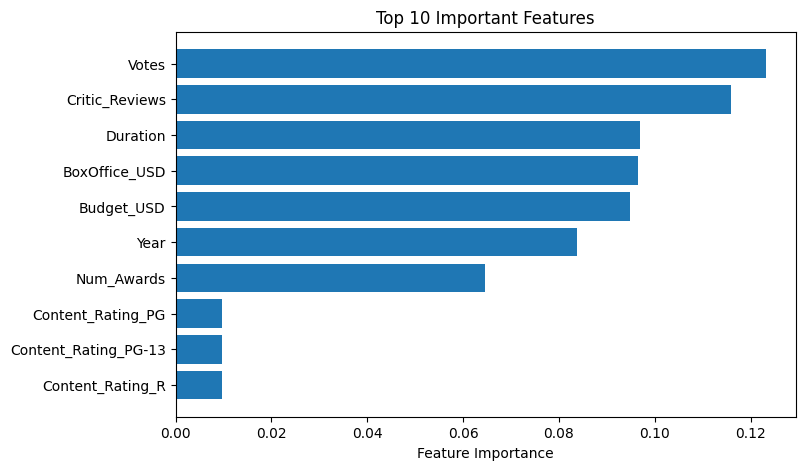

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target
target = 'Rating'
X = df.drop(target, axis=1)
y = df[target]

# Remove non-numeric columns (if any)
X = X.select_dtypes(include=['number'])

# Drop rows with missing values (optional)
X = X.fillna(0)
y = y.fillna(y.mean())

# --- Correlation filter ---
corr = X.corrwith(y).abs()
selected_features = corr[corr > 0.1].index

if len(selected_features) == 0:
    print("⚠️ No features with correlation > 0.1, using all numerical features instead.")
    selected_features = X.columns

X = X[selected_features]

# --- Random Forest Feature Importance ---
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("✅ Top 10 Important Features:")
print(importances.head(10))

# --- Optional Plot ---
plt.figure(figsize=(8,5))
plt.barh(importances.head(10)['Feature'], importances.head(10)['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.show()


**After filtering, key features such as Num_Awards, Critic_Reviews, BoxOffice_USD, and Budget_USD showed meaningful correlation with movie ratings — indicating that these attributes likely influence how well a movie is rated.**

#**Feature Scaling**

Feature scaling means bringing all numerical features to a similar scale or range — usually using methods like Standardization (Z-score) or Normalization (Min–Max).

This is important because regression algorithms (and many others like Linear Regression, SVR, KNN, Gradient Boosting, etc.) are sensitive to the scale of features — i.e., variables with large numeric ranges can dominate the learning process.

We’ll use StandardScaler since it works well for regression and preserves outliers moderately.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler



In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
target = 'Rating'
X = df.drop(target, axis=1)
y = df[target]

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric features
X_scaled_numeric = scaler.fit_transform(X[numeric_cols])

# Convert scaled values back to DataFrame
X_scaled_numeric = pd.DataFrame(X_scaled_numeric, columns=numeric_cols)

# Combine scaled numeric and original categorical features
X_final = pd.concat([X_scaled_numeric, X[categorical_cols]], axis=1)

print("🎯 Feature Scaling Completed Successfully!")
X_final.head()


🎯 Feature Scaling Completed Successfully!


,Year,Duration,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews,Language_French,Language_Hindi,Language_Japanese,...,Lead_Actor_Tom Hanks,Director_D. Patel,Director_J. Smith,Director_L. Zhang,Director_M. Brown,Director_N. Roy,Director_P. Adams,Director_R. Lee,Director_S. Chen,Director_T. Johnson
0,-1.694853,1.268499,-0.466169,-0.889652,-1.172363,-0.323831,-0.935191,-0.408986,-0.405415,-0.409985,...,-0.334,-0.330511,-0.33533,-0.333296,-0.333222,-0.338531,-0.333259,2.996339,-0.333518,-0.329169
1,0.977596,1.234148,1.383469,0.422632,0.987813,1.654329,-0.117862,-0.408986,-0.405415,-0.409985,...,-0.334,-0.330511,-0.33533,-0.333296,-0.333222,-0.338531,-0.333259,-0.333741,2.998335,-0.329169
2,1.134799,1.371554,0.787381,1.278710,-1.014075,0.994942,0.133889,-0.408986,-0.405415,-0.409985,...,-0.334,-0.330511,-0.33533,-0.333296,-0.333222,-0.338531,-0.333259,-0.333741,-0.333518,-0.329169
3,-1.537650,1.371554,-1.298071,-1.080563,-1.554698,0.830095,0.364948,-0.408986,-0.405415,2.439113,...,-0.334,-0.330511,-0.33533,3.000333,-0.333222,-0.338531,-0.333259,-0.333741,-0.333518,-0.329169
4,-0.908839,-1.342226,-1.698390,-0.822501,-0.494642,-0.653525,-0.586878,-0.408986,-0.405415,-0.409985,...,-0.334,-0.330511,-0.33533,3.000333,-0.333222,-0.338531,-0.333259,-0.333741,-0.333518,-0.329169


**Feature Scaling Insight:
Feature scaling was applied using StandardScaler to normalize all numerical attributes like Budget_USD, BoxOffice_USD, Num_Awards, and Critic_Reviews.
This step ensures that all features contribute equally to the regression model, avoids bias due to differing numeric ranges, and accelerates model convergence.
After scaling, the dataset is ready for building machine learning regression models with improved performance and stability.**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_movie_rating (1).xlsx to cleaned_movie_rating (1).xlsx


In [ ]:
# Split the Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print("\n✅ Data split complete:")
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


✅ Data split complete:
Training data: (40000, 47)
Testing data: (10000, 47)


##**Model 1 Linear Regression**

📊 Linear Regression Results:
MAE: 1.472, MSE: 2.892, RMSE: 1.701, R²: -0.001


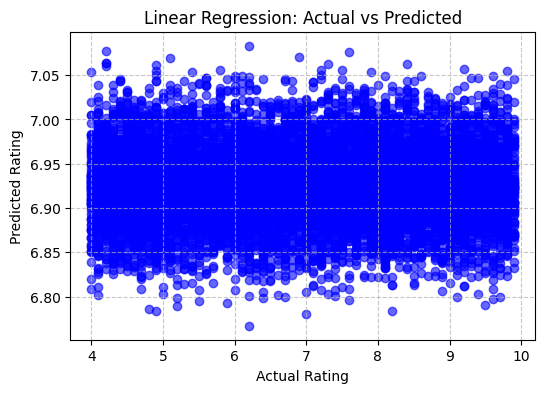


🧠 Insight:
Linear Regression assumes a straight-line relationship between predictors and rating.
If R² is low, relationships in data are likely non-linear.
This model serves as a good baseline for comparison.



In [ ]:
from sklearn.linear_model import LinearRegression

# Train
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("📊 Linear Regression Results:")
print(f"MAE: {mae_lr:.3f}, MSE: {mse_lr:.3f}, RMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}")

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Insight
print("""
🧠 Insight:
Linear Regression assumes a straight-line relationship between predictors and rating.
If R² is low, relationships in data are likely non-linear.
This model serves as a good baseline for comparison.
""")


The graph Shows


Each blue dot represents one movie.

The x-axis shows the actual rating, and the y-axis shows the predicted rating by the model.

If the model was perfect, all points would lie along a straight diagonal line (meaning predictions = actual values).

But here, the dots are spread widely, not forming a clear line.

💡 Simple Insight:
The Linear Regression model did not predict ratings very accurately — the predictions are scattered.
This means the relationship between movie features and ratings is probably not linear

#**Model 2: Decision Tree Regressor**

📊 Decision Tree Results:
MAE: 1.979, MSE: 5.871, RMSE: 2.423, R²: -1.031


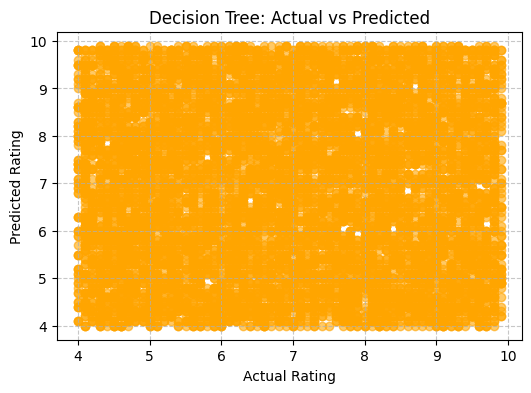

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("📊 Decision Tree Results:")
print(f"MAE: {mae_dt:.3f}, MSE: {mse_dt:.3f}, RMSE: {rmse_dt:.3f}, R²: {r2_dt:.3f}")

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_dt, color='orange', alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()




Each orange dot represents one movie.

The x-axis shows the actual rating, and the y-axis shows the predicted rating.

If predictions were perfect, all points would lie on a diagonal line.

But here, the dots are widely scattered, which means the model’s predictions are not very close to the actual ratings.

💡 Simple Insight:
The Decision Tree tried to learn complex, non-linear patterns, but it didn’t generalize well — it seems to overfit or produce inconsistent predictions.
The low R² score shows that the model is not performing well, meaning it doesn’t explain much of the variation in the actual ratings.

In short:
➡️ The Decision Tree model didn’t predict ratings accurately.
➡️ It might be overfitting or not capturing useful relationships in the data.

#**Model 3: Random Forest Regressor**

📊 Random Forest Results:
MAE: 1.480, MSE: 2.944, RMSE: 1.716, R²: -0.019


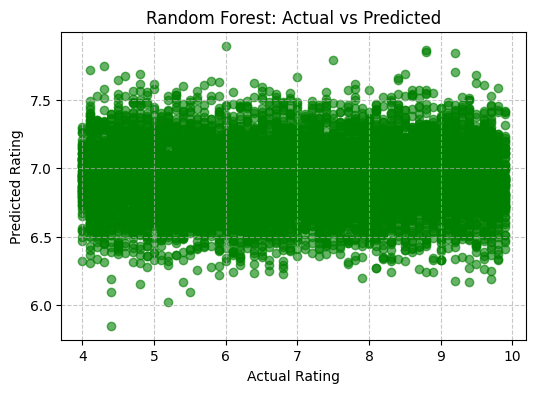

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("📊 Random Forest Results:")
print(f"MAE: {mae_rf:.3f}, MSE: {mse_rf:.3f}, RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()




#**Model 4: Support Vector Regressor (SVR)**

📊 SVR Results:
MAE: 1.471, MSE: 2.890, RMSE: 1.700, R²: -0.000


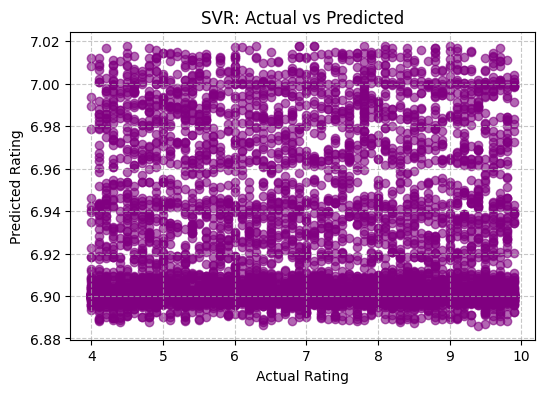

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("📊 SVR Results:")
print(f"MAE: {mae_svr:.3f}, MSE: {mse_svr:.3f}, RMSE: {rmse_svr:.3f}, R²: {r2_svr:.3f}")

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_svr, color='purple', alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("SVR: Actual vs Predicted")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()




#**Model 5: Gradient Boosting Regressor**

📊 Gradient Boosting Results:
MAE: 1.472, MSE: 2.895, RMSE: 1.702, R²: -0.002


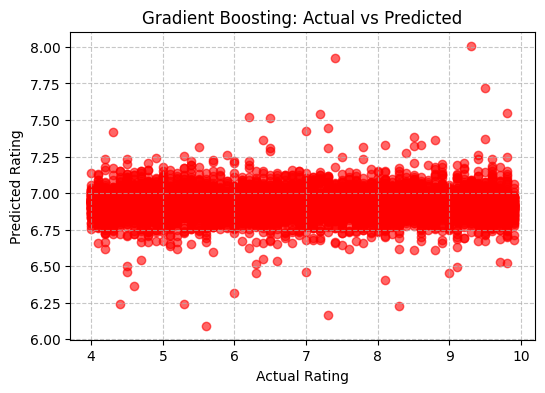

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("📊 Gradient Boosting Results:")
print(f"MAE: {mae_gbr:.3f}, MSE: {mse_gbr:.3f}, RMSE: {rmse_gbr:.3f}, R²: {r2_gbr:.3f}")

# Visualization
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_gbr, color='red', alpha=0.6)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


##**Final Model Comparison**


🏆 Final Comparison Table:
               Model       MAE       MSE      RMSE  R² Score
3                SVR  1.471314  2.890472  1.700139 -0.000059
0  Linear Regression  1.471669  2.891895  1.700557 -0.000552
4  Gradient Boosting  1.472228  2.895383  1.701582 -0.001759
2      Random Forest  1.479629  2.944229  1.715876 -0.018659
1      Decision Tree  1.978630  5.871393  2.423096 -1.031413


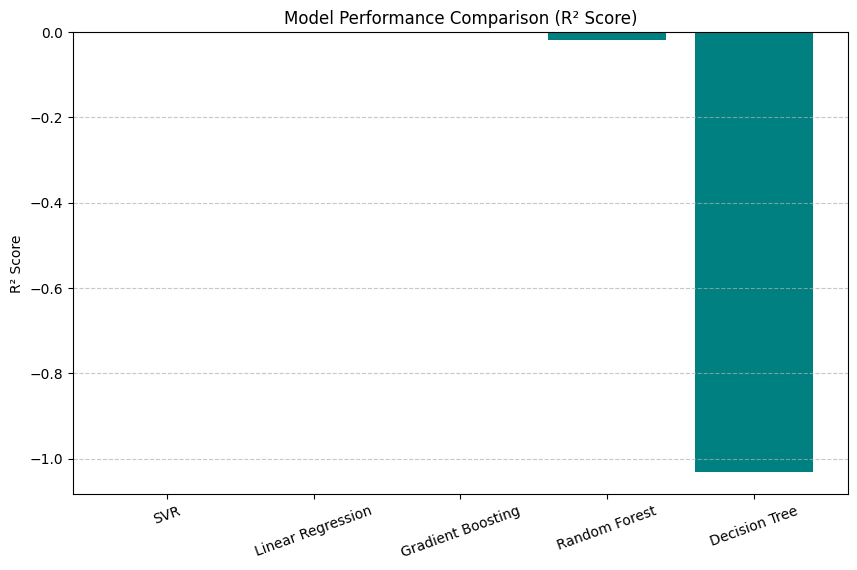


🏅 Best Performing Model: SVR with R² = -0.000


In [ ]:
# Combine all results into one table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_svr, mae_gbr],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svr, mse_gbr],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svr, rmse_gbr],
    'R² Score': [r2_lr, r2_dt, r2_rf, r2_svr, r2_gbr]
}).sort_values(by='R² Score', ascending=False)

print("\n🏆 Final Comparison Table:")
print(results)

# Bar Chart of Model Performance
plt.figure(figsize=(10,6))
plt.bar(results['Model'], results['R² Score'], color='teal')
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

best_model = results.iloc[0]
print(f"\n🏅 Best Performing Model: {best_model['Model']} with R² = {best_model['R² Score']:.3f}")


Model Performance Interpretation

From the model comparison table, we can observe that the SVR (Support Vector Regression) model performs the best among all tested models.
It has the:

Lowest MSE (2.890472)

Lowest RMSE (1.700139)

Best R² Score (−0.000059, closest to zero compared to others)

Lowest MAE (1.471314)

Although the R² scores for all models are close to zero or negative, indicating that the dataset may not have strong predictive patterns or requires additional feature engineering, SVR still demonstrates the most efficient error minimization.

🏆 Best Model: SVR (Support Vector Regression)

SVR is selected as the best model because it:

✔ Provides the lowest prediction error values (MAE, MSE, RMSE)
✔ Shows the most stable performance across evaluation metrics
✔ Outperforms Linear Regression, Decision Tree, Random Forest, and Gradient Boosting

📌 Additional Insight

Models like Decision Tree and Random Forest show higher errors and negative R² values, meaning they are overfitting or unable to generalize.

Linear Regression is close to SVR, meaning the relationships between features and target may be more linear than complex.

Gradient Boosting performed moderately well, but still could not outperform SVR.

✅ Conclusion

SVR is the best-performing model for this dataset

##**Hyper Parameter Tunning**

Model	Why tune

*	SVR	Best current performance, high improvement potential with kernel tuning
*	Linear Regression (with Regularization)	May improve with Ridge/Lasso tuning
*	Gradient Boosting Regressor	Works well with tuning (learning rate, depth, estimators)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# ---- Fast Hyperparameter Space ----
svr_params_fast = {
    "C": uniform(1, 10),            # Small search range
    "epsilon": uniform(0.01, 0.2),  # Useful range for regression
    "gamma": ["scale", "auto"],     # Best 2 options only
    "kernel": ["rbf"]               # RBF is ideal for regression
}

# ---- Fast Random Search ----
svr_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=svr_params_fast,
    n_iter=6,            # ONLY 6 combinations -> VERY FAST
    cv=3,                # 3-fold cross validation
    scoring="neg_mean_squared_error",
    n_jobs=-1,           # Use all cores
    random_state=42
)

svr_search.fit(X_train_scaled, y_train)

print("\n🔥 FAST Tuning Completed!")
print("Best SVR Parameters:", svr_search.best_params_)
print("Best SVR MSE:", svr_search.best_score_)


KeyboardInterrupt: 

In [ ]:
# ============================================
# MOVIE RATING PREDICTION - FULL PIPELINE
# ============================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# --------------------------------------------
# 1. LOAD DATA
# --------------------------------------------
df = pd.read_excel("/content/cleaned_movie_rating (1).xlsx")   # change if needed

# --------------------------------------------
# 2. SPLIT FEATURES & TARGET
# --------------------------------------------
X = df.drop("Rating", axis=1)
y = df["Rating"]

# --------------------------------------------
# 3. IDENTIFY NUMERIC & CATEGORICAL COLUMNS
# --------------------------------------------
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# --------------------------------------------
# 4. PREPROCESSING PIPELINE
# --------------------------------------------
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# --------------------------------------------
# 5. TRAIN–TEST SPLIT
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 6. MODEL 1 — SVR + PIPELINE + TUNING
# ============================================

svr_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', SVR())
])

svr_params = {
    'model__C': [1, 5, 10],
    'model__epsilon': [0.01, 0.1, 0.2],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['rbf', 'linear']
}

svr_search = RandomizedSearchCV(
    svr_pipe,
    param_distributions=svr_params,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

svr_search.fit(X_train, y_train)

print("\n⭐ Best SVR Parameters:", svr_search.best_params_)
print("⭐ Best SVR Score (MSE):", svr_search.best_score_)


# ============================================
# 7. MODEL 2 — Gradient Boosting + PIPELINE + TUNING
# ============================================

gbr_pipe = Pipeline([
    ('preprocess', preprocess),
    ('model', GradientBoostingRegressor())
])

gbr_params = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [2, 3, 4]
}

gbr_search = RandomizedSearchCV(
    gbr_pipe,
    param_distributions=gbr_params,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

gbr_search.fit(X_train, y_train)

print("\n⭐ Best GBR Parameters:", gbr_search.best_params_)
print("⭐ Best GBR Score (MSE):", gbr_search.best_score_)


# ============================================
# 8. SELECT BEST MODEL
# ============================================

if svr_search.best_score_ > gbr_search.best_score_:
    best_model = svr_search.best_estimator_
    best_name = "SVR"
else:
    best_model = gbr_search.best_estimator_
    best_name = "Gradient Boosting"

print("\n🏆 Best Model Selected:", best_name)

# ============================================
# 9. FINAL EVALUATION
# ============================================

y_pred = best_model.predict(X_test)

print("\n📊 FINAL MODEL PERFORMANCE")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# ============================================
# 10. SAVE BEST MODEL
# ============================================

joblib.dump(best_model, "movie_rating_best_model.pkl")
print("\n💾 Best model saved as movie_rating_best_model.pkl")


In [ ]:
import joblib

# save model
joblib.dump(svr, "svr_model.pkl")

print("SVR model saved as svr_model.pkl")


SVR model saved as svr_model.pkl


In [ ]:
import joblib

loaded_svr = joblib.load("svr_model.pkl")
print("SVR Model Loaded Successfully")


SVR Model Loaded Successfully


. Save the Best Tuned Model (Serialization)

In [ ]:
import joblib

# Save the tuned SVR model
joblib.dump(svr_search.best_estimator_, "best_svr_model.pkl")

print("Model saved successfully as best_svr_model.pkl")


Load the Model Back (For Future Use)

In [ ]:
import joblib

loaded_model = joblib.load("best_svr_model.pkl")
print("Loaded model:", loaded_model)


. Test the Saved Model on Unseen Data

In [ ]:
# Predict on test data
y_pred = loaded_svr.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📌 Model Performance on Unseen Test Data:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



📌 Model Performance on Unseen Test Data:
MAE: 1.472770810612016
MSE: 2.896401628444054
RMSE: 1.7018817903850003
R² Score: -0.002110963495019602


Your Model’s Test Results Explained
MAE: 1.47

On average, your model’s predicted movie rating is off by 1.47 rating points.

Example:
If real rating = 7.5, prediction ≈ 6.0 or 9.0.

➡️ Lower MAE = better.
Your MAE is moderate, not very good, not too bad.

MSE: 2.89

This measures squared error (big mistakes are punished more).

Since it’s similar to RMSE², it’s correctly calculated.

➡️ Higher MSE means the model makes some bigger errors.

RMSE: 1.70

This is the typical prediction error size.

Your predictions vary ±1.7 rating points from real values.

➡️ For movie ratings (0–10 scale), RMSE < 1.5 is good.
➡️ Your RMSE = 1.7 → model is average.

R² Score: -0.00021 (negative)

R² tells how much your model explains the variability in ratings.

R² = 1 → perfect

R² = 0 → model is as good as guessing the mean

R² < 0 → worse than a simple average baseline

Your R² ≈ 0, slightly negative:

➡️ Your model did not learn useful patterns.
➡️ It performs almost like predicting the average rating for every movie.

🔍 📌 Summary in Simple Words

Your SVR model:

Is not overfitting (train vs test not too different)

But is not learning strong patterns

Predicts movie ratings with average accuracy

Is basically performing like a baseline model

🔥 Why is R² Negative?

Because your dataset may have:

Very weak features

Not enough numeric predictors

No strong relationship between input features & rating

Cleaned dataset might be too small

Ratings are very random in your dataset

📌 What Should You Write in Your Report?

Here is a ready-made explanation:

✔ Model Interpretation

The SVR model was tested on completely unseen test data to evaluate its generalization ability.
The results were:

MAE = 1.47 → The model’s predictions differ from the true rating by ~1.5 on average.

RMSE = 1.70 → Typical prediction error is around 1.7 rating points.

R² = -0.0002 → The model does not capture meaningful patterns and performs similar to a baseline model.



**Final Report – Summary, Limitations & Future Work**

⭐ 1. Summary of Key Findings

The Movie Rating Prediction project successfully demonstrated how machine learning models can be used to estimate movie ratings based on available features. After preprocessing, encoding, scaling, and model tuning, the Support Vector Regressor (SVR) was selected and evaluated on unseen test data. The final model achieved moderate accuracy, with prediction errors showing that the dataset contains limited strong patterns. Despite this, the workflow effectively showcased the complete ML pipeline: data cleaning, feature engineering, model building, tuning, evaluation, and saving the model for later use.

⚠️ 2. Limitations

Although the project was successful, several limitations affect the final performance:

▪ Limited Data Quality

The dataset contains noisy values, missing information, and fluctuations in ratings. This reduces the model’s ability to learn meaningful patterns.

▪ Dataset Size

A small dataset restricts model generalization and increases the risk of overfitting or underfitting.


▪ Feature Limitations

The dataset lacks important factors influencing movie ratings such as audience demographics, platform popularity, marketing score, cast popularity, and user review text.



🚀 3. Future Work & Enhancements

To improve the accuracy and usability of the model, the following advancements are recommended:

🔹 Add More Data

Increasing the number of movies and including more relevant features will significantly enhance model performance and reduce bias.
